In [31]:
#importing necessary libraries
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import glob
from glob import glob
from pathlib import Path
from sklearn import *
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder


In [32]:
import os

In [33]:
#mounting google drive
#from google.colab import drive
#drive.mount('/content/drive')

<h1>Data importation

Formating

In [34]:
#NonDemented
folder_path = 'Alzheimer_s Dataset/train/Project//NonDemented'
for filename in os.listdir(folder_path):
    if filename.startswith('nonDem'):
        img_path = os.path.join(folder_path, filename)
        im1 = Image.open(img_path)
        im1 = im1.convert('RGB')
        im1.save(os.path.join(folder_path, filename.split('.')[0] + '.jpg'))

In [35]:
#MildDemented
folder_path = '/Project/Alzheimer_s Dataset/train/MildDemented'
for filename in os.listdir(folder_path):
    if filename.startswith('mildDem'):
        img_path = os.path.join(folder_path, filename)
        im1 = Image.open(img_path)
        im1 = im1.convert('RGB')
        im1.save(os.path.join(folder_path, filename.split('.')[0] + '.jpg'))

In [36]:
#ModerateDemented
folder_path = '/Users/isaurepilot/Documents/Columbia/Spring 2024/ML in practice/Project/Alzheimer_s Dataset/train_augmented/ModerateDementedAugmented'
for filename in os.listdir(folder_path):
    if filename.startswith('moderateDem'):
        img_path = os.path.join(folder_path, filename)
        im1 = Image.open(img_path)
        im1 = im1.convert('RGB')
        im1.save(os.path.join(folder_path, filename.split('.')[0] + '.jpg'))

In [37]:
#VeryMildDemented
folder_path = '/Project/Alzheimer_s Dataset/train_augmented/VeryMildDemented'
for filename in os.listdir(folder_path):
    if filename.startswith('verymildDem'):
        img_path = os.path.join(folder_path, filename)
        im1 = Image.open(img_path)
        im1 = im1.convert('RGB')
        im1.save(os.path.join(folder_path, filename.split('.')[0] + '.jpg'))

In [38]:
#DATASET CREATION
dataset_path = Path('Project/Alzheimer_s Dataset/train_augmented')
images_link = list(dataset_path.glob(r'**/*.jpg'))
images_l = [x.parents[0].stem for x in images_link]
images_folder=[x.parents[1].stem for x in images_link]

images_labels=LabelEncoder().fit_transform(images_l)

df=pd.DataFrame()
df['Link']=images_link
df['label']=images_l
df['Label_Int']=images_labels

In [40]:
df_MildDemented = df[df['label'] == 'MildDemented']
df_MildDemented_link = df_MildDemented['Link']

In [41]:
df_ModerateDemented = df[df['label'] == 'ModerateDemented']
df_ModerateDemented_link = df_ModerateDemented['Link']

In [42]:
df_VeryMildDemented = df[df['label'] == 'VeryMildDemented']
df_VeryMildDemented_link = df_VeryMildDemented['Link']

In [43]:
df_NonDemented = df[df['label'] == 'NonDemented']
df_NonDemented_link = df_NonDemented['Link']

/var/folders/h7/wbg2xwm57h5drszs2320r4mh0000gn/T/ipykernel_1599/764604587.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 6, ind+1)


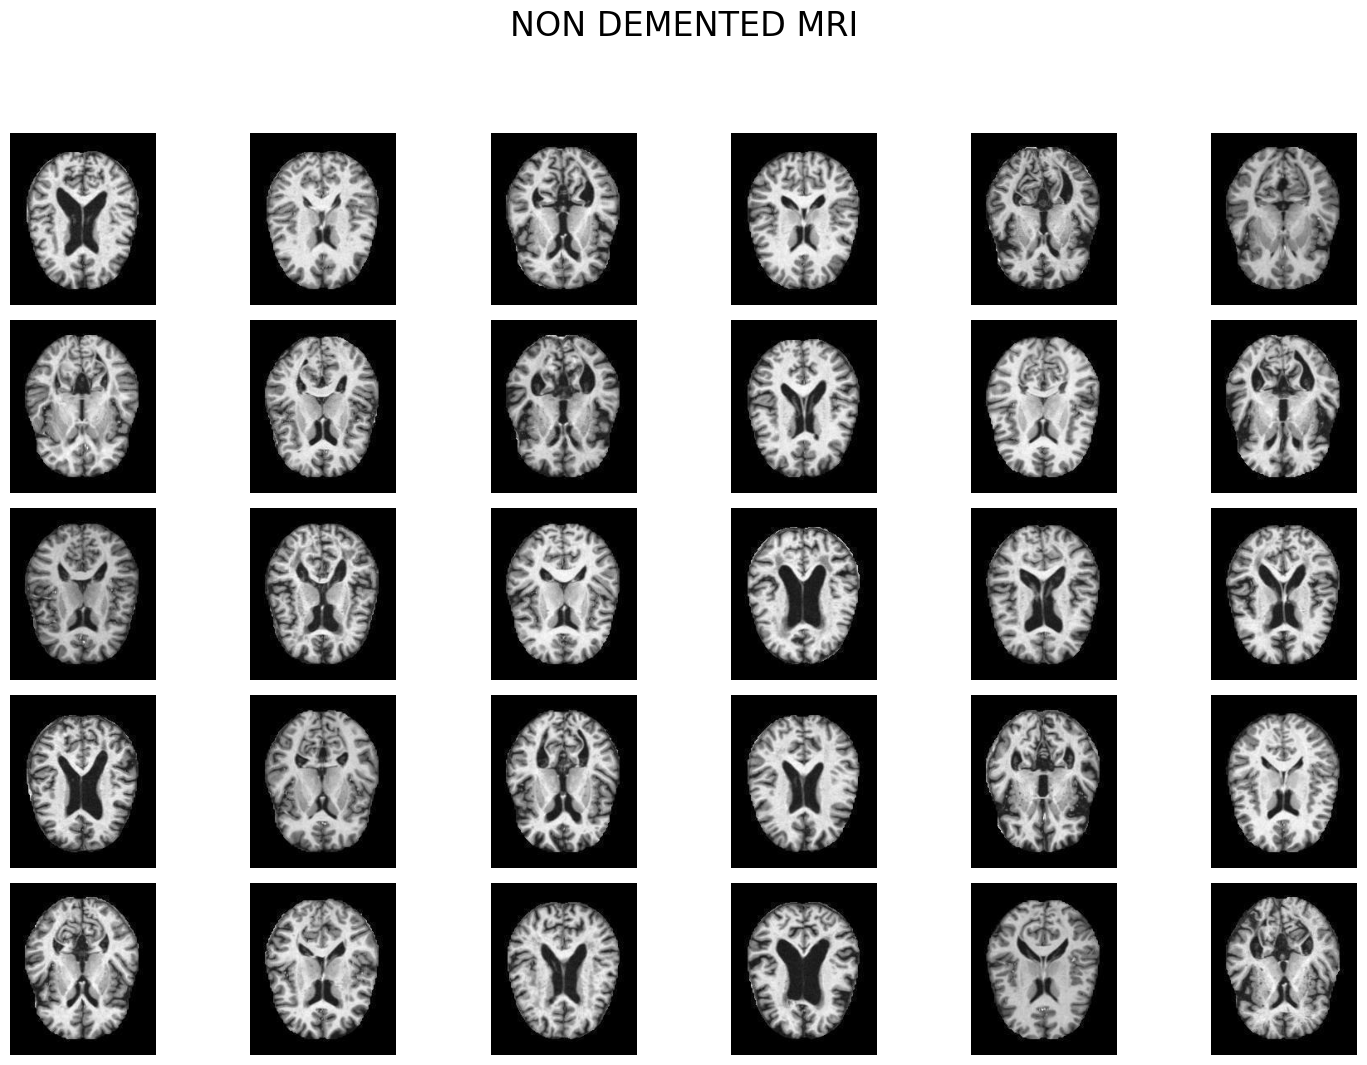

In [44]:
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('NON DEMENTED MRI', fontsize=24, y=1.06)

for ind, img_src in enumerate(df_NonDemented_link[1:31]):
    plt.subplot(5, 6, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img)

plt.show()

/var/folders/h7/wbg2xwm57h5drszs2320r4mh0000gn/T/ipykernel_1599/2109455783.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 6, ind+1)


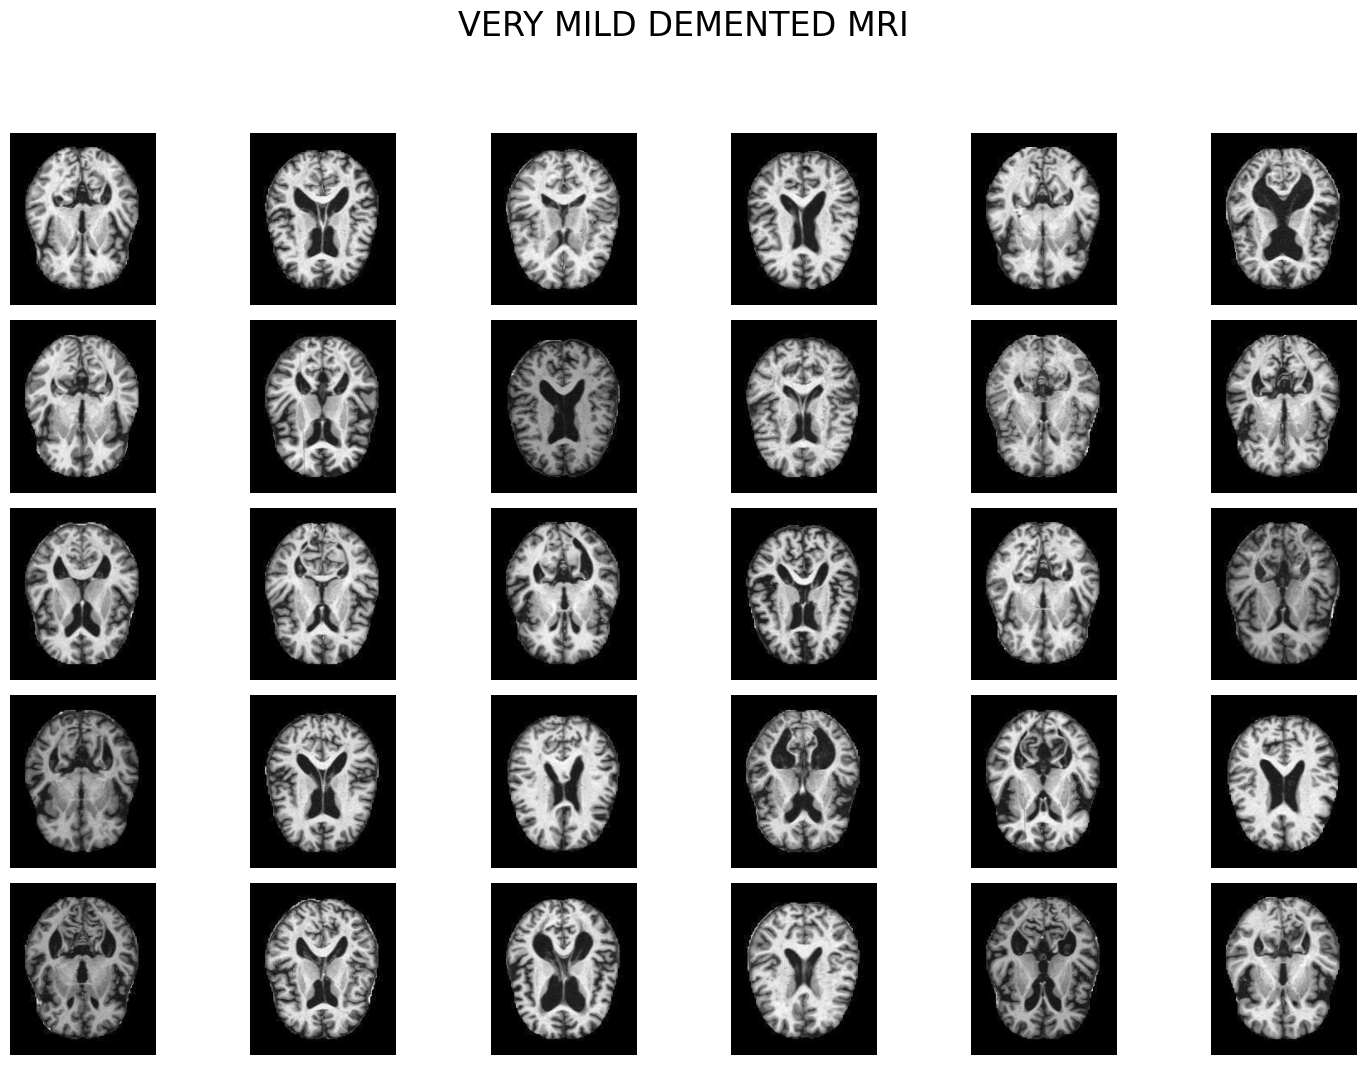

In [45]:
#VeryMildDemented
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('VERY MILD DEMENTED MRI', fontsize=24, y=1.06)
for ind, img_src in enumerate(df_VeryMildDemented_link[1:31]):
    plt.subplot(5, 6, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img)

plt.show()

/var/folders/h7/wbg2xwm57h5drszs2320r4mh0000gn/T/ipykernel_1599/3621857954.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5, 6, ind+1)


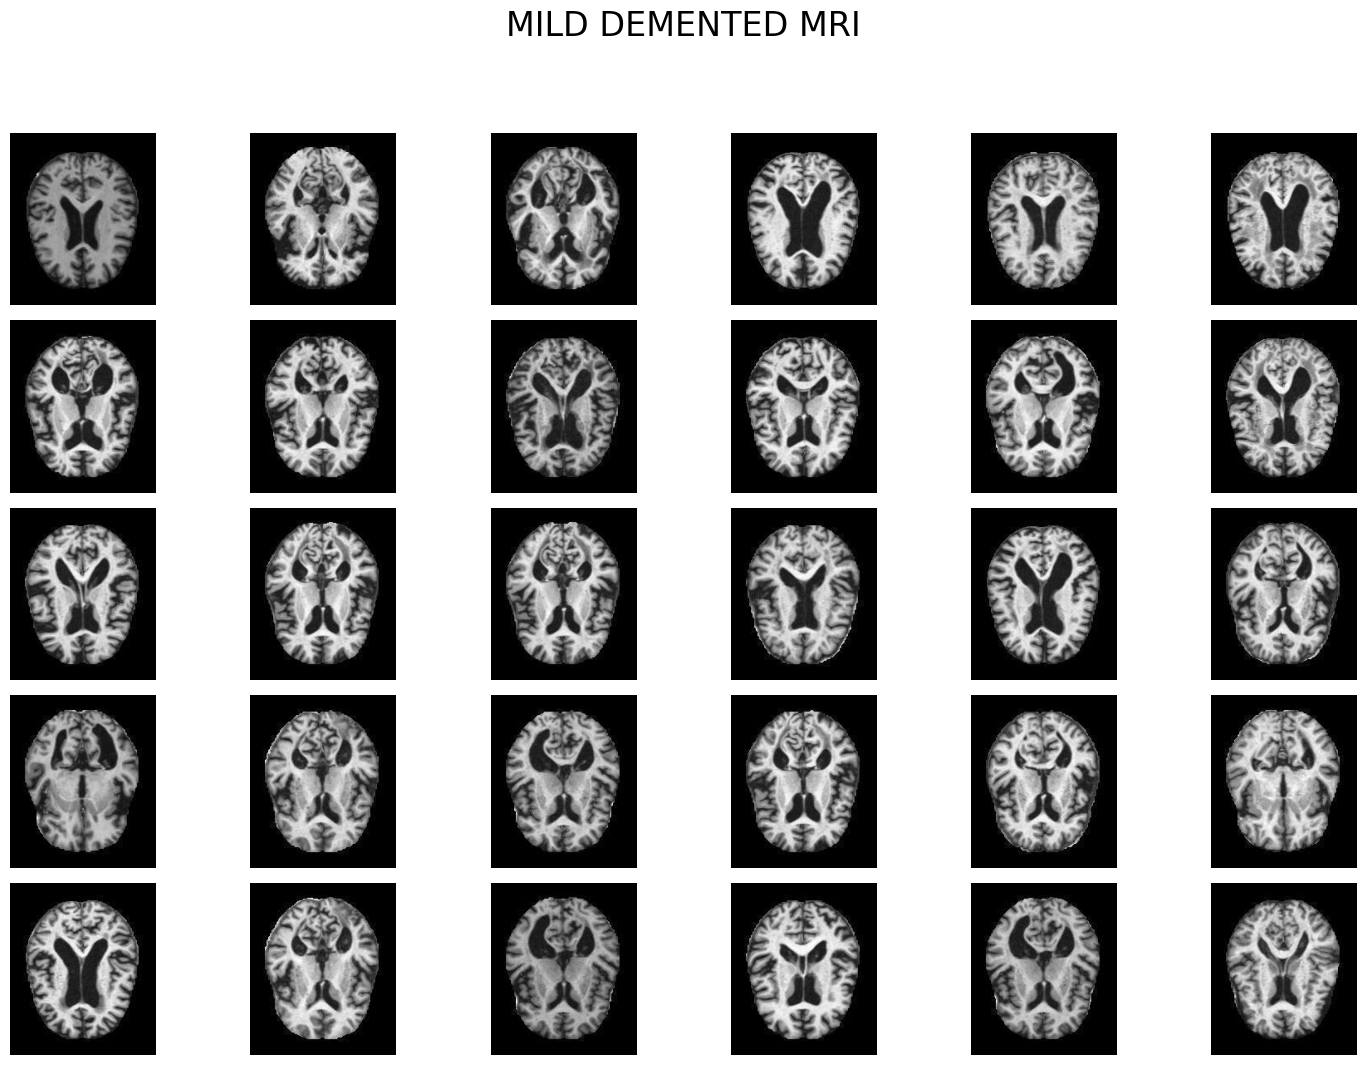

In [46]:
#MildDemented
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('MILD DEMENTED MRI', fontsize=24, y=1.06)
for ind, img_src in enumerate(df_MildDemented_link[1:31]):
    plt.subplot(5, 6, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img)

plt.show()

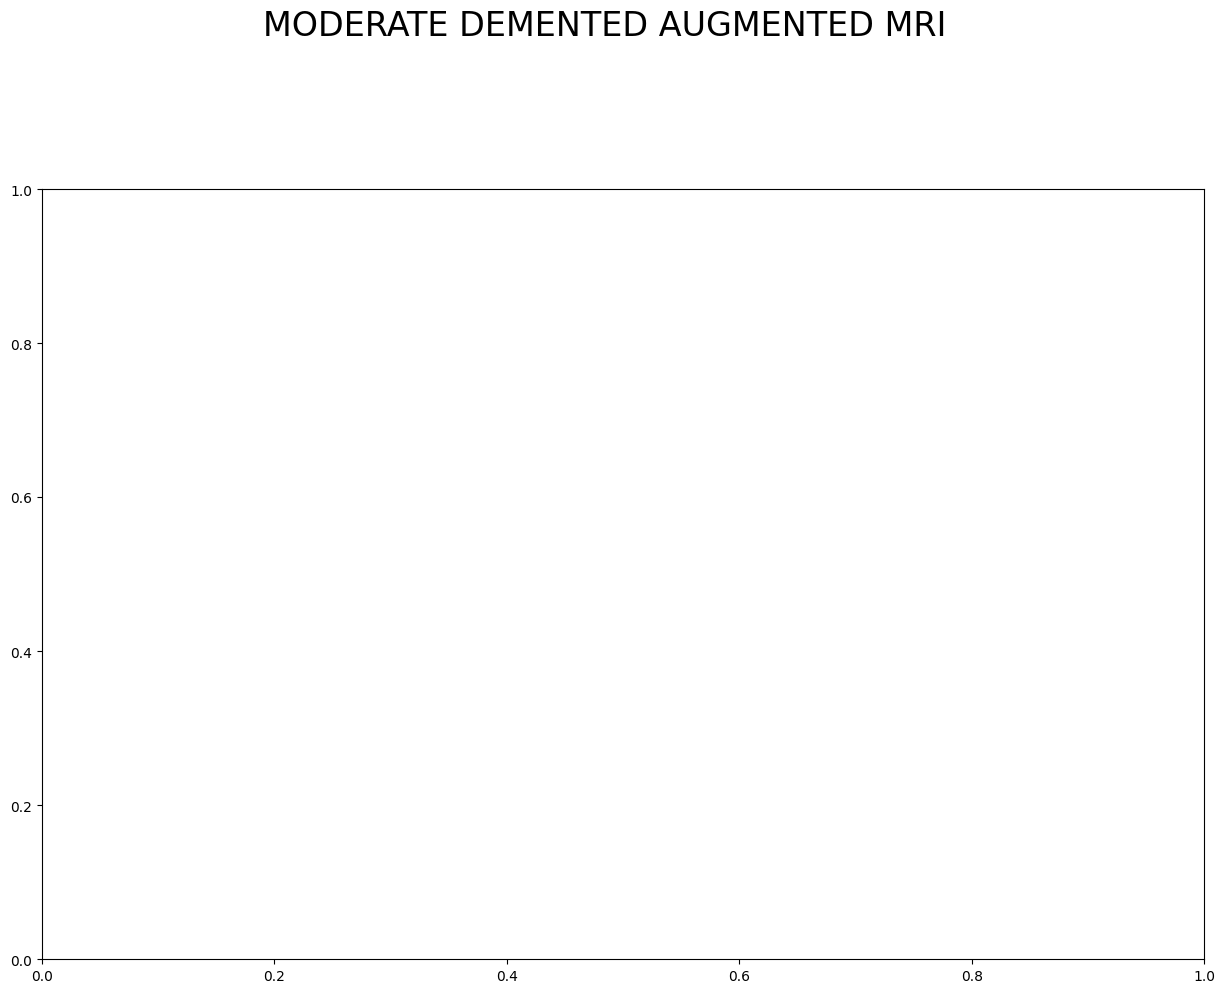

In [47]:
#ModerateDemented
fig, ax = plt.subplots(figsize=(15, 10))
fig.suptitle('MODERATE DEMENTED AUGMENTED MRI', fontsize=24, y=1.06)

for ind, img_src in enumerate(df_ModerateDemented_link[1:31]):
    plt.subplot(5, 6, ind+1)
    img = plt.imread(img_src)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(img)

In [48]:
#samples in each directory
MildDemented=glob('Project/Alzheimer_s Dataset/train_augmented/**/MildDemented/*.jpg', recursive=True)
ModerateDemented=glob('Project/Alzheimer_s Dataset/train_augmented/**/ModerateDementedAugmented/*.jpg', recursive=True)
NonDemented=glob('Project/Alzheimer_s Dataset/train_augmented/**/NonDemented/*.jpg', recursive=True)
VeryMildDemented=glob('Project/Alzheimer_s Dataset/train_augmented/**/VeryMildDemented/*.jpg', recursive=True)

print('No. of files in the directory Mild Demented:', len(MildDemented))
print('No. of files in the directory Moderate Demented:', len(ModerateDemented))
print('No. of files in the directory Non Demented:', len(NonDemented))
print('No. of files in the directory Very Mild Demented:', len(VeryMildDemented))

No. of files in the directory Mild Demented: 717
No. of files in the directory Moderate Demented: 62
No. of files in the directory Non Demented: 2560
No. of files in the directory Very Mild Demented: 1792


In [49]:
#accessing images
data = glob('/Alzheimer_s Dataset/train_augmented/**/*.jpg', recursive=True)
print('No. of Images in the directory ', len(data))

No. of Images in the directory  0


# **CNN WITHOUT PREPROCESSING**

In [50]:
from keras.preprocessing import image
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tqdm import tqdm
from PIL import Image
import keras.utils as image
from keras.utils import to_categorical

In [51]:
Imagedata = df[['Link','Label_Int']].copy()
Imagedata.rename(columns={'Link':'image', 'Label_Int':'target'},inplace=True)

In [52]:
from tqdm import tqdm
from keras.preprocessing import image
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Define a portion of the data to be used for validation and test
validation_split = 0.2  
test_split = 0.2  

# Prepare the training data
train_image = []
y_train = []
for i in tqdm(range(Imagedata.shape[0])):
    img = image.load_img(Imagedata['image'].iloc[i], target_size=(75, 75))
    img = image.img_to_array(img)
    img = (img-127.5) / 127.5  # Normalize pixel values in -1, 1
    train_image.append(img)
    y_train.append(Imagedata['target'].iloc[i])



import cv2
import numpy as np

#RGB to grayscale since MRIs are in black and white either way

def rgb_to_gray(images):
    gray_images = []
    for img in images:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray_images.append(gray)
    return np.array(gray_images)

def resize_images(images, size=(75, 75)):
    resized_images = []
    for img in images:
        resized = cv2.resize(img, size)
        resized_images.append(resized)
    return np.array(resized_images)

def add_channel(images):
    return images[..., np.newaxis]


gray_X_train = rgb_to_gray(train_image)

# Resize grayscale images to (75, 75)
resized_gray_X_train = resize_images(gray_X_train)

# Add channel dimension to grayscale images
train_image = add_channel(resized_gray_X_train)

# Every picture of shape (75, 75, 1)




X_train, X_test, Y_train, Y_test = train_test_split(train_image, y_train, test_size=test_split, random_state=42)

# Split the remaining data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=validation_split, random_state=42)

# Convert lists to numpy arrays
X_train = np.array(X_train)
train_images = X_train.copy()
X_val = np.array(X_val)
X_test = np.array(X_test)
train_labels = np.array(Y_train)
Y_train = to_categorical(Y_train, 4)
Y_val = to_categorical(Y_val, 4)
Y_test = to_categorical(Y_test, 4)


100%|██████████| 5131/5131 [00:03<00:00, 1692.50it/s]


In [53]:
train_labels

array([3, 2, 2, ..., 2, 2, 3])

In [54]:
X_train.shape

(3283, 75, 75, 1)

<h2> 2D CNN

In [55]:
model = Sequential()

model.add(Conv2D(filters =32, kernel_size = (3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(75,75,1)))
model.add(MaxPooling2D(pool_size=(1,1)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'valid',activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(X_train, Y_train, batch_size=10, epochs = 25, validation_data=(X_val, Y_val))

Epoch 1/25


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


329/329 ━━━━━━━━━━━━━━━━━━━━ 63s 187ms/step - accuracy: 0.4877 - loss: 1.0759 - val_accuracy: 0.5530 - val_loss: 0.9254
Epoch 2/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 64s 195ms/step - accuracy: 0.5375 - loss: 0.9222 - val_accuracy: 0.5944 - val_loss: 0.8829
Epoch 3/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 68s 207ms/step - accuracy: 0.5921 - loss: 0.8716 - val_accuracy: 0.6066 - val_loss: 0.8240
Epoch 4/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 67s 202ms/step - accuracy: 0.6094 - loss: 0.8250 - val_accuracy: 0.6261 - val_loss: 0.7796
Epoch 5/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 70s 213ms/step - accuracy: 0.6594 - loss: 0.7305 - val_accuracy: 0.7052 - val_loss: 0.6448
Epoch 6/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 63s 191ms/step - accuracy: 0.7190 - loss: 0.6164 - val_accuracy: 0.7649 - val_loss: 0.5755
Epoch 7/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 73s 221ms/step - accuracy: 0.8020 - loss: 0.4896 - val_accuracy: 0.7186 - val_loss: 0.5959
Epoch 8/25
329/329 ━━━━━━━━━━━━━━━━━━━━ 77s 235ms/step - accuracy: 0.8415 - loss: 0.4072 - val

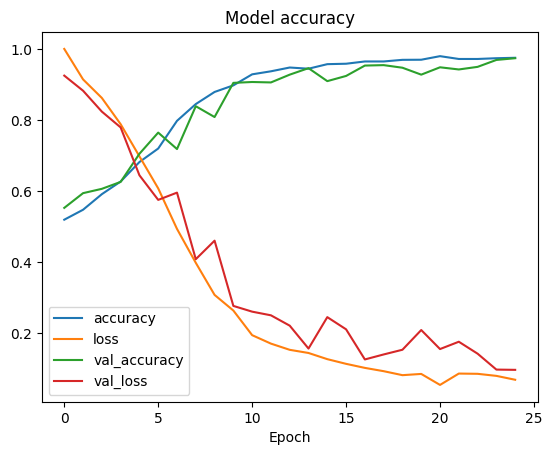

In [56]:
history_df = pd.DataFrame(history.history)
history_df.plot()
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.show()

In [57]:
model.evaluate(X_test, Y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - accuracy: 0.9689 - loss: 0.0983


[0.09595675766468048, 0.9659201502799988]

In [58]:
pred = model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step


In [59]:
from sklearn.metrics import accuracy_score
print('Model Accuracy score', accuracy_score(np.argmax(pred, axis=1), np.argmax(Y_test, axis=1)))

Model Accuracy score 0.9659201557935735


In [60]:
from sklearn.metrics import classification_report

preds = np.argmax(pred, axis=1)
actual_label = np.argmax(Y_test, axis=1)
print(classification_report(actual_label, preds))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       126
           1       0.87      1.00      0.93        13
           2       0.96      0.98      0.97       510
           3       0.97      0.94      0.96       378

    accuracy                           0.97      1027
   macro avg       0.95      0.97      0.96      1027
weighted avg       0.97      0.97      0.97      1027



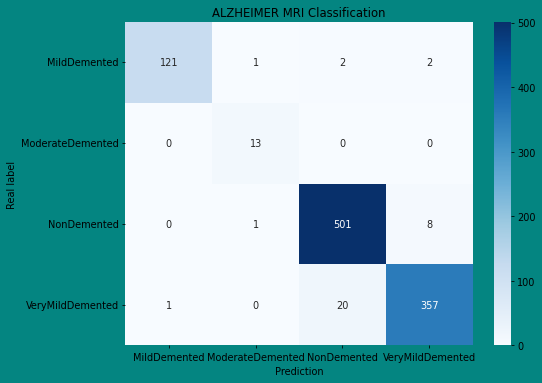

In [77]:
from sklearn.metrics import confusion_matrix


labels=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
cnf = confusion_matrix(actual_label, preds)
plt.figure(figsize=(8,6), dpi=70, facecolor='w', edgecolor='k')
ax = sns.heatmap(cnf, cmap='Blues', annot=True, fmt = 'd', xticklabels=labels, yticklabels=labels)
plt.title('ALZHEIMER MRI Classification')
plt.xlabel('Prediction')
plt.ylabel('Real label')

fig = plt.gcf()
fig.set_facecolor('#048581')


plt.show(ax)

<h2>Prediction

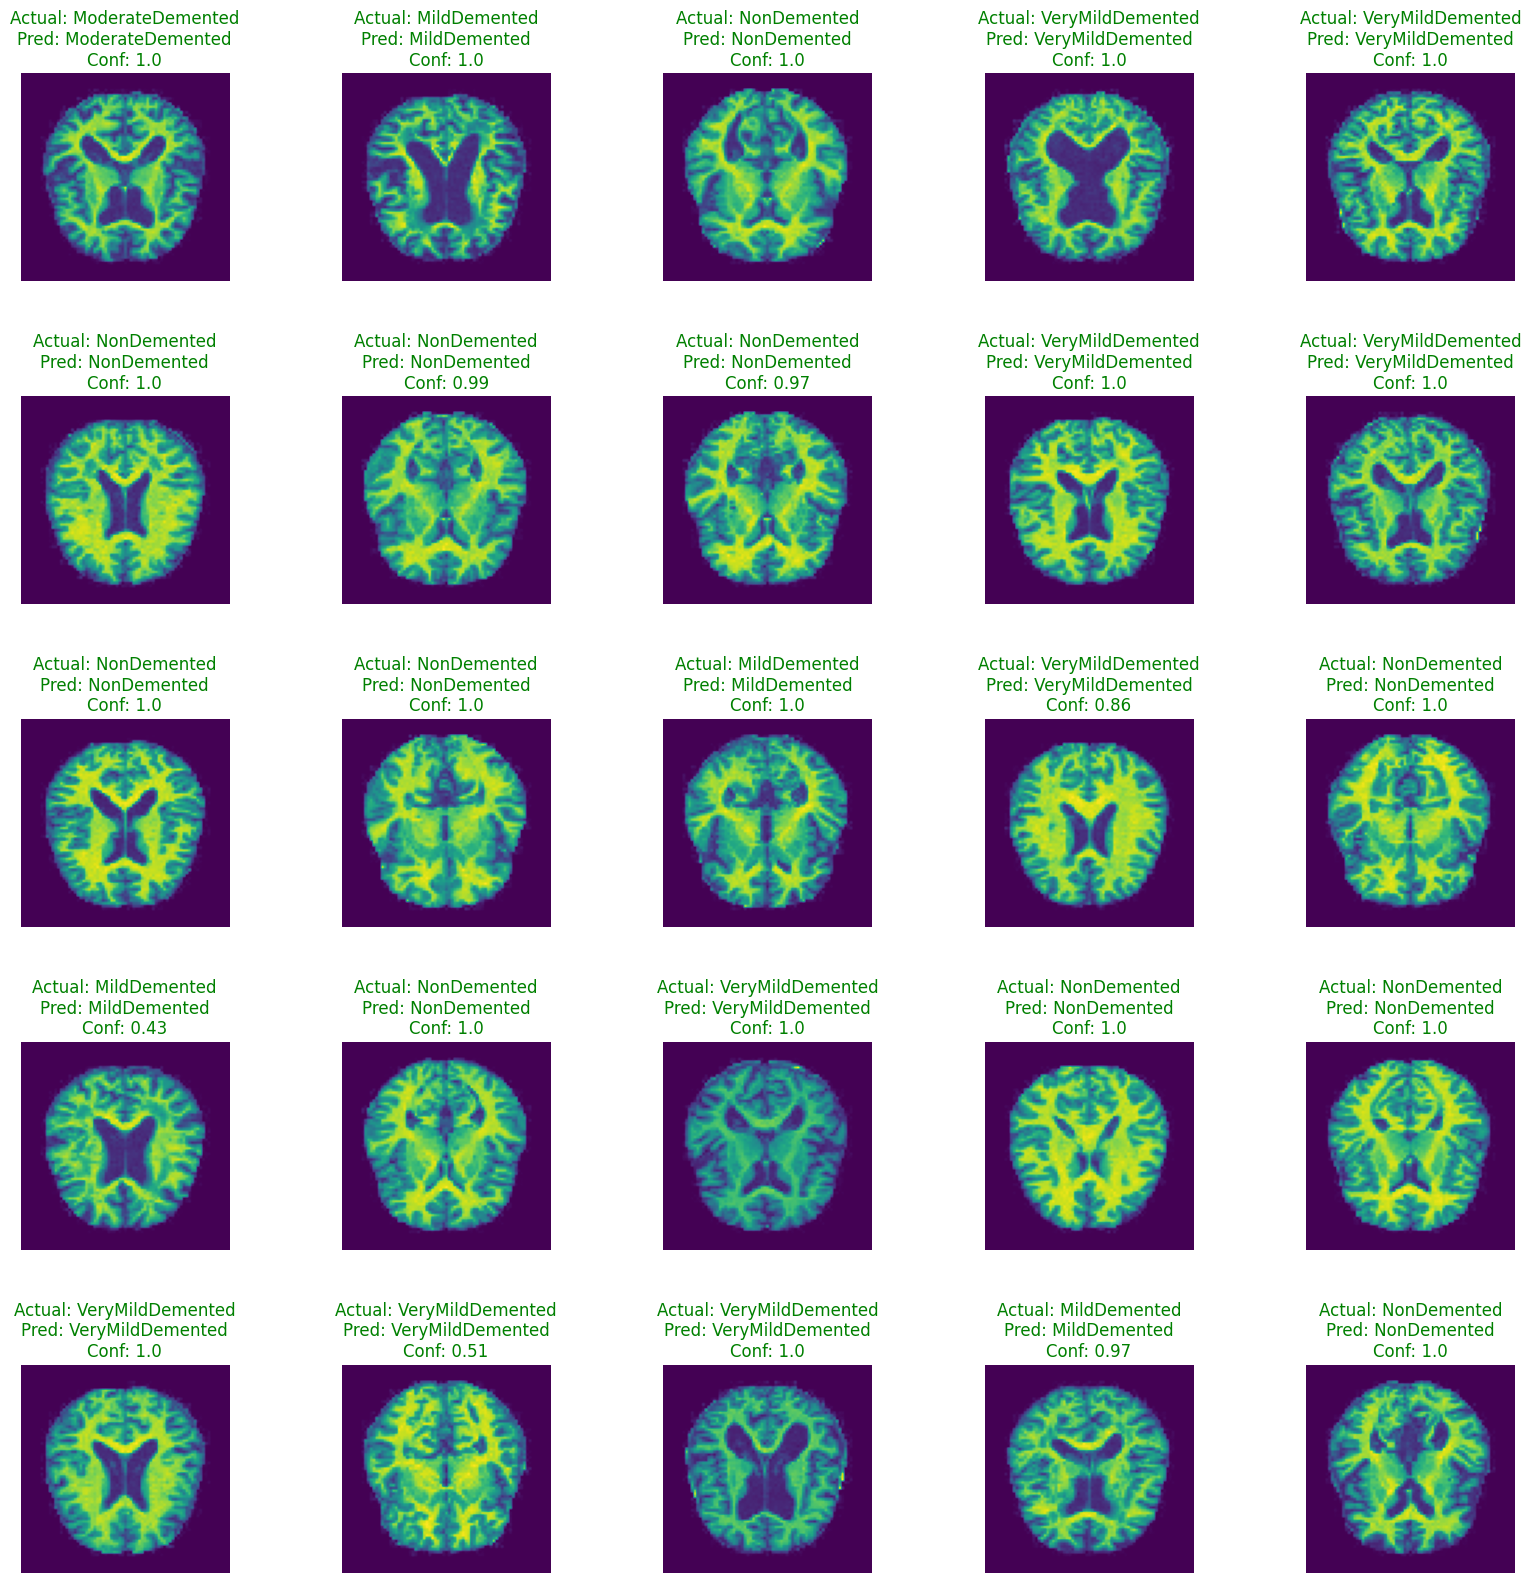

In [62]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual = actual_label[img_idx]
        predicted = preds[img_idx]
        confidence = round(pred[img_idx][predicted], 2)
        ax[i][j].axis('off')
        if(labels[actual]==labels[predicted]):
           ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence),color='green')
        else:
          ax[i][j].set_title('Actual: '+labels[actual]+'\nPred: '+labels[predicted] + '\nConf: ' +str(confidence),color='red')

        ax[i][j].imshow(X_test[img_idx])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)